In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,Y_train),(X_test, Y_test)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
Y_train[:7]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2]], dtype=uint8)

In [6]:
Y_train=Y_train.reshape(-1,)
Y_train[:6]

array([6, 9, 9, 4, 1, 1], dtype=uint8)

In [7]:
Y_test=Y_test.reshape(-1,)
Y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

In [8]:
# Verify the data
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [9]:
def plot_image_sample(X,Y,index):
   plt.figure(figsize=(15,2))
   plt.imshow(X[index])
   plt.xlabel(classes[Y[index]])

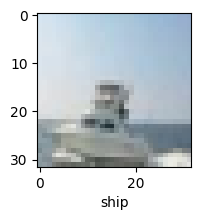

In [10]:
plot_image_sample(X_train,Y_train,100)

In [11]:
X_train,X_test= X_train/255.0, X_test/255.0

In [12]:
# Build the ANN model
ann_model= models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(10,activation="softmax")
])

In [13]:
#compile the ANN model
ann_model.compile(optimizer="adam",
                  loss="SparseCategoricalCrossentropy",
                  metrics=['accuracy'])

In [14]:
# Train the ANN model
ann_history=ann_model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 42s 26ms/step - loss: 1.8586 - accuracy: 0.3254
Epoch 2/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.6793 - accuracy: 0.3982
Epoch 3/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.6065 - accuracy: 0.4246
Epoch 4/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.5525 - accuracy: 0.4452
Epoch 5/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.5126 - accuracy: 0.4566
Epoch 6/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.4852 - accuracy: 0.4712
Epoch 7/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.4603 - accuracy: 0.4753
Epoch 8/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.4412 - accuracy: 0.4815
Epoch 9/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.4204 - accuracy: 0.4901
Epoch 10/10
1563/1563 [==============================] - 40s 26m

In [16]:
# Evalute the ANN model
ann_test_loss, ann_test_acc = ann_model.evaluate(X_test,Y_test,verbose=2)
print(f"Test_accuracy of ANN : {ann_test_acc}")

313/313 - 2s - loss: 1.4698 - accuracy: 0.4713 - 2s/epoch - 6ms/step
Test_accuracy of ANN : 0.47130000591278076


In [17]:
# Predict using the ANN model
Y_pred = ann_model.predict(X_test)
Y_pred_classes = [np.argmax(element) for element in Y_pred]

313/313 [==============================] - 3s 10ms/step


In [18]:
from sklearn.metrics import confusion_matrix, classification_report
# Print classification report
print("Classification report:\n", classification_report(Y_test, Y_pred_classes))

Classification report:
               precision    recall  f1-score   support

           0       0.46      0.60      0.52      1000
           1       0.54      0.65      0.59      1000
           2       0.42      0.22      0.29      1000
           3       0.35      0.21      0.26      1000
           4       0.37      0.45      0.40      1000
           5       0.37      0.46      0.41      1000
           6       0.46      0.59      0.52      1000
           7       0.56      0.51      0.53      1000
           8       0.65      0.53      0.58      1000
           9       0.56      0.49      0.52      1000

    accuracy                           0.47     10000
   macro avg       0.47      0.47      0.46     10000
weighted avg       0.47      0.47      0.46     10000



In [19]:
Y_classes=[np.argmax(element) for element in Y_pred]
Y_classes[:5]

[3, 9, 1, 0, 4]

In [20]:
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

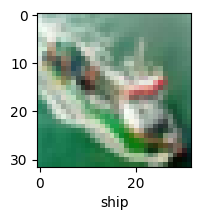

In [28]:
# Display some predictions
plot_image_sample(X_test, Y_test, 15)

In [29]:
print(classes[Y_classes[15]])

ship


In [30]:
# Build the CNN model
cnn_model = models.Sequential([
            layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
            layers.MaxPooling2D((2, 2)),

            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),

            layers.Flatten(),
            layers.Dense(64,activation='relu'),
            layers.Dense(10,activation='softmax')
])

In [31]:
# Compile the model
cnn_model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [32]:
# Train the model
cnn_model.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 67s 42ms/step - loss: 1.5190 - accuracy: 0.4550
Epoch 2/5
1563/1563 [==============================] - 65s 41ms/step - loss: 1.1706 - accuracy: 0.5863
Epoch 3/5
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0365 - accuracy: 0.6392
Epoch 4/5
1563/1563 [==============================] - 65s 41ms/step - loss: 0.9515 - accuracy: 0.6705
Epoch 5/5
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8917 - accuracy: 0.6919


In [33]:
cnn_model.evaluate(X_test,Y_test)

313/313 [==============================] - 6s 20ms/step - loss: 0.9370 - accuracy: 0.6785


[0.9370064735412598, 0.6784999966621399]

In [34]:
Y_pred=cnn_model.predict(X_test)

313/313 [==============================] - 6s 19ms/step


In [35]:
# Evaluate the model
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(X_test, Y_test, verbose=2)
print(f"Test accuracy (CNN): {cnn_test_acc}")

313/313 - 6s - loss: 0.9370 - accuracy: 0.6785 - 6s/epoch - 20ms/step
Test accuracy (CNN): 0.6784999966621399


In [38]:
Y_classes=[np.argmax(element) for element in Y_pred]
Y_classes[:10]

[3, 8, 8, 0, 4, 6, 1, 6, 3, 1]

In [39]:
Y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

Predicted class: ship
True class: ship


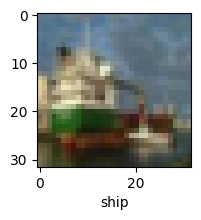

In [45]:
# Display some predictions
plot_image_sample(X_test, Y_test, 51)
print(f"Predicted class: {classes[Y_pred_classes[51]]}")
print(f"True class: {classes[Y_test[51]]}")